In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
meta = pd.read_csv("external_data/PRECISE2_metadata.tsv", sep="\t")

In [17]:
df = pd.read_csv("external_data/PRECISE2_counts.csv")
df

,Geneid,ecoli_00178,ecoli_00188,ecoli_00825,ecoli_00057,ecoli_00471,ecoli_00215,ecoli_00270,ecoli_00100,ecoli_00019,...,ecoli_00393,ecoli_00800,ecoli_00195,ecoli_00265,ecoli_00037,ecoli_00419,ecoli_00567,ecoli_00784,ecoli_00544,ecoli_00338
0,b0001,1033,64,1079,464,19,1515,52,761,13,...,258,435,363,372,5,238,677,101,48,385
1,b0002,4831,47376,29852,4125,715,36396,13114,15639,3164,...,16736,6609,34432,22045,7387,25654,32192,19660,1827,56611
2,b0003,1216,14035,8113,1467,595,11199,5566,4338,1692,...,4794,2414,10421,5903,2445,7398,7113,4766,719,16584
3,b0004,1201,18761,10339,1528,658,14476,8043,5340,1342,...,7401,2257,13940,6350,2886,12073,9795,7853,821,20620
4,b0005,77,250,161,42,161,315,270,304,53,...,233,69,315,101,34,348,424,295,98,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4350,b4399,212,336,127,121,66,274,86,119,206,...,128,87,255,205,110,254,156,154,74,258
4351,b4400,90,141,48,51,14,108,43,29,83,...,44,45,101,112,30,44,130,16,50,90
4352,b4401,9583,12507,4117,1780,6416,7860,5796,1985,15762,...,3837,2234,4180,10014,5686,3679,5409,4864,4090,3605
4353,b4402,18,4,16,15,16,17,25,15,3,...,18,7,13,25,5,10,71,7,26,15


In [18]:
experiments_anaero = meta[meta["study"] == "ICA"].loc[:, ["Experiment", "condition_id"]]
experiments_anaero

exp_ids = list(experiments_anaero.loc[:, "Experiment"])
exp_cond = list(experiments_anaero.loc[:, "condition_id"])

In [19]:
output = df.loc[df["Geneid"] == "b3349", exp_ids]

output.columns = exp_cond

output.transpose()

,3324
wt_glc,10739
wt_glc,9823
wt_glc,11001
wt_glc,6425
arg_sbt,5154
arg_sbt,6300
cytd_rib,6924
cytd_rib,6962
gth,8355
gth,12161


# Check environments with hydrogenase activation

In [20]:
goi = ["b097"+str(i) for i in np.arange(2,8)] + ["b24"+str(i) for i in np.arange(81,93)] + ["b27"+str(i) for i in np.arange(17,26)] + ["b299"+str(i) for i in np.arange(0,8)]

goi

['b0972',
 'b0973',
 'b0974',
 'b0975',
 'b0976',
 'b0977',
 'b2481',
 'b2482',
 'b2483',
 'b2484',
 'b2485',
 'b2486',
 'b2487',
 'b2488',
 'b2489',
 'b2490',
 'b2491',
 'b2492',
 'b2717',
 'b2718',
 'b2719',
 'b2720',
 'b2721',
 'b2722',
 'b2723',
 'b2724',
 'b2725',
 'b2990',
 'b2991',
 'b2992',
 'b2993',
 'b2994',
 'b2995',
 'b2996',
 'b2997']

In [21]:
hydrogenase_expr = df.loc[df["Geneid"].isin(goi), :]
hydrogenase_expr = hydrogenase_expr.set_index("Geneid").transpose()
hydrogenase_expr.sort_values("b2995").tail(40)

Geneid,b0972,b0973,b0974,b0975,b0976,b0977,b2481,b2482,b2483,b2484,...,b2724,b2725,b2990,b2991,b2992,b2993,b2994,b2995,b2996,b2997
ecoli_00214,80,128,75,75,40,94,1,47,3,12,...,7,9,180,107,249,556,1791,865,2660,3247
ecoli_00334,81,103,48,57,21,57,5,18,5,11,...,4,5,118,165,570,843,3641,903,1073,1298
ecoli_00315,22,29,19,25,6,27,4,30,9,13,...,14,27,76,80,214,431,1325,904,1804,2993
ecoli_00213,75,183,68,79,40,82,2,26,1,4,...,7,5,202,191,391,867,2374,993,2469,3668
ecoli_00318,30,72,29,26,25,34,2,28,2,6,...,13,21,101,97,300,503,1523,1005,2069,3671
ecoli_00503,19,36,8,22,10,21,3,12,3,7,...,1,3,158,126,478,601,3430,1013,1369,2147
ecoli_00488,25,24,8,16,5,12,1,7,0,2,...,1,0,121,127,435,604,3719,1091,1612,2517
ecoli_00075,37,117,46,32,27,44,0,25,6,6,...,5,4,91,72,337,390,1834,1103,1765,3137
ecoli_00225,49,173,54,65,34,73,0,41,3,12,...,6,2,146,174,424,899,2184,1137,2156,3366
ecoli_00475,121,134,46,41,15,48,1,22,2,8,...,3,2,77,112,658,893,3930,1141,1228,1669


In [22]:
meta.loc[meta["Experiment"]=="ecoli_00213"].transpose()

,204
Experiment,ecoli_00213
sample_id,ytf__delybaO__1
study,yTF
project_id,ytf
condition_id,delybaO
rep_id,1
contact,Ye Gao
creator,Ye Gao
run_date,10/2/17
Strain Description,Escherichia coli K-12 MG1655 del_ybaO


In [23]:
goi_formate = ["b389"+str(i) for i in np.arange(1,5)] + ["b147"+str(i) for i in np.arange(4,7)] + ["b4079"]

goi_formate

['b3891', 'b3892', 'b3893', 'b3894', 'b1474', 'b1475', 'b1476', 'b4079']

In [24]:
formate_expr = df.loc[df["Geneid"].isin(goi_formate), :]
formate_expr = formate_expr.set_index("Geneid").transpose()
formate_expr.sort_values("b4079").tail(40)

Geneid,b1474,b1475,b1476,b3891,b3892,b3893,b3894,b4079
ecoli_00036,100,22,29,973,188,300,3762,1577
ecoli_00760,141,16,45,618,101,52,252,1610
ecoli_00460,680,68,60,1043,259,285,1660,1611
ecoli_00458,851,71,51,861,269,319,1990,1629
ecoli_00205,582,54,113,735,198,131,1226,1639
ecoli_00079,475,49,39,1056,334,229,1997,1640
ecoli_00457,814,67,63,1036,286,333,2008,1647
ecoli_00556,220,69,94,875,260,353,4244,1648
ecoli_00310,431,42,55,818,186,135,671,1667
ecoli_00150,91,20,29,647,207,37,276,1679


In [25]:
meta.loc[meta["Experiment"]=="ecoli_00477"].transpose()

,468
Experiment,ecoli_00477
sample_id,tcs__del_cusR_lb__1
study,Two Component Systems
project_id,tcs
condition_id,del_cusR_lb
rep_id,1
contact,Katherine Decker
creator,Julia Kleinmanns
run_date,6/27/19
Strain Description,Escherichia coli K-12 MG1655 del_cusR


In [50]:
random_expr = df.set_index("Geneid").transpose()
random_expr.loc[:, "b3908"].sort_values().tail(40)

ecoli_00543     75613
ecoli_00548     78035
ecoli_00544     84665
ecoli_00572     88691
ecoli_00599     89830
ecoli_00020     92022
ecoli_00522     93714
ecoli_00590     94977
ecoli_00563     96564
ecoli_00019     98011
ecoli_00549     98848
ecoli_00616    102221
ecoli_00603    106765
ecoli_00581    113008
ecoli_00551    114890
ecoli_00550    119790
ecoli_00617    119869
ecoli_00602    120005
ecoli_00536    125943
ecoli_00021    129464
ecoli_00561    129752
ecoli_00591    131298
ecoli_00578    131988
ecoli_00538    137005
ecoli_00022    137442
ecoli_00556    139324
ecoli_00537    141170
ecoli_00539    142298
ecoli_00576    149719
ecoli_00580    152619
ecoli_00621    154831
ecoli_00570    161460
ecoli_00605    165319
ecoli_00620    168548
ecoli_00571    193917
ecoli_00604    198383
ecoli_00589    199506
ecoli_00588    253036
ecoli_00577    263110
ecoli_00562    297839
Name: b3908, dtype: int64

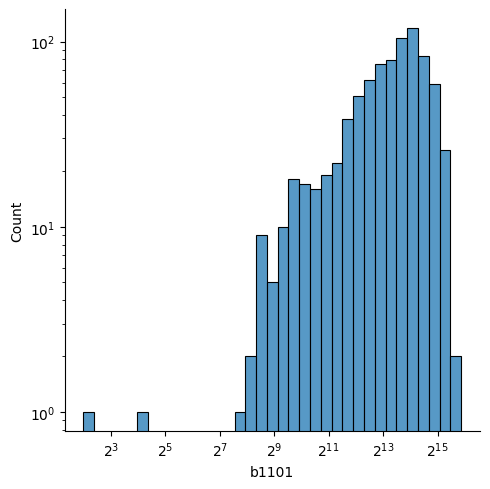

In [37]:
sns.displot(random_expr.loc[:, "b1101"], log_scale=[2, True])

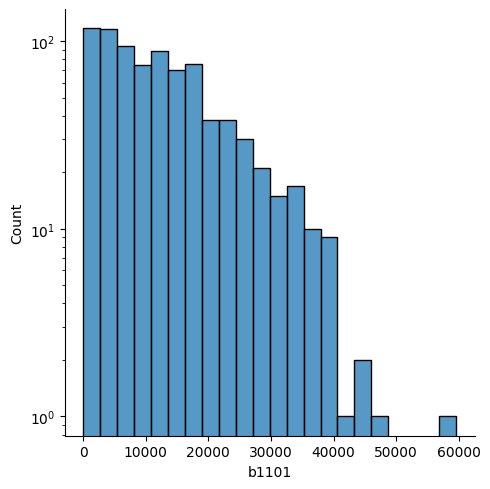

In [38]:
sns.displot(random_expr.loc[:, "b1101"], log_scale=[False, True])

In [48]:
head_exp=list(random_expr.loc[:, "b3908"].sort_values().tail(40).index)

meta.loc[meta["Experiment"].isin(head_exp)]

,Experiment,sample_id,study,project_id,condition_id,rep_id,contact,creator,run_date,Strain Description,...,Sequencing Machine,Additional Details,Biological Replicates,DOI,GEO,Published,SRX,Run,LibraryLayout,Platform
18,ecoli_00019,oxidative__wt_pq__1,Oxidative,oxidative,wt_pq,1,Sangwoo Seo,Sangwoo Seo,8/27/14,Escherichia coli K-12 MG1655,...,MiSeq,NaN,2,doi.org/10.1016/j.celrep.2015.07.043,GSE65711,1.0,SRX871628,SRR1796598,PAIRED,ILLUMINA
19,ecoli_00020,oxidative__wt_pq__2,Oxidative,oxidative,wt_pq,2,Sangwoo Seo,Sangwoo Seo,8/27/14,Escherichia coli K-12 MG1655,...,MiSeq,NaN,2,doi.org/10.1016/j.celrep.2015.07.043,GSE65711,1.0,SRX871629,SRR1796599,PAIRED,ILLUMINA
20,ecoli_00021,oxidative__deloxyr_pq__1,Oxidative,oxidative,deloxyr_pq,1,Sangwoo Seo,Sangwoo Seo,9/4/14,Escherichia coli K-12 MG1655 del_oxyR,...,MiSeq,NaN,2,doi.org/10.1016/j.celrep.2015.07.043,GSE65711,1.0,SRX871630,SRR1796600,PAIRED,ILLUMINA
21,ecoli_00022,oxidative__deloxyr_pq__2,Oxidative,oxidative,deloxyr_pq,2,Sangwoo Seo,Sangwoo Seo,9/4/14,Escherichia coli K-12 MG1655 del_oxyR,...,MiSeq,NaN,2,doi.org/10.1016/j.celrep.2015.07.043,GSE65711,1.0,SRX871631,SRR1796601,PAIRED,ILLUMINA
513,ecoli_00522,ros_tale__1_112_750pq__2,ROS TALE,ros_tale,1_112_750pq,2,Kevin Rychel,Justin Tan,1/21/20,Escherichia Coli ERS.1.112,...,NextSeq,NaN,3,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
527,ecoli_00536,ros_tale__7_103_250pq__1,ROS TALE,ros_tale,7_103_250pq,1,Kevin Rychel,Justin Tan,9/20/19,Escherichia Coli ERS.7.103,...,NextSeq,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
528,ecoli_00537,ros_tale__7_103_250pq__2,ROS TALE,ros_tale,7_103_250pq,2,Kevin Rychel,Justin Tan,9/20/19,Escherichia Coli ERS.7.103,...,NextSeq,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
529,ecoli_00538,ros_tale__7_103_750pq__1,ROS TALE,ros_tale,7_103_750pq,1,Kevin Rychel,Justin Tan,9/20/19,Escherichia Coli ERS.7.103,...,NextSeq,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
530,ecoli_00539,ros_tale__7_103_750pq__2,ROS TALE,ros_tale,7_103_750pq,2,Kevin Rychel,Justin Tan,9/20/19,Escherichia Coli ERS.7.103,...,NextSeq,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
534,ecoli_00543,ros_tale__9_77_250pq__2,ROS TALE,ros_tale,9_77_250pq,2,Kevin Rychel,Justin Tan,9/20/19,Escherichia Coli ERS.9.77,...,NextSeq,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
